# Run all cells
To print the accuracy of the model as in the report, simply click on run all cells in the Cell tab above

In [1]:
# Need to excute this line first
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import os

In [2]:
# Need to load the MNist data to work with
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)
# one hot true gives the y labels as vectors with 1's which correspond to the number it is

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
im_size = 28
im_flat = im_size**2

# Also have a dimsension of 10 for the one hot vectors.
num_digits = 10

In [4]:
# need placeholders for the inputs to train, x, and the true labels
x = tf.placeholder( tf.float32, shape =[None, im_flat])
# None is used as it the number of images to be used is not yet defined
# possible to pass throught any size data, with 784 features(pixels)

# Create a placeholder for the y labels
y_label = tf.placeholder( tf.float32, shape = [None, num_digits])

# Since y_labels are one hot vectors, get the actual digit label.
y_digit = tf.argmax(y_label, dimension = 1)


In [5]:
# Need to define Variables that will be optimized

# The Dimensionality of the weight vector to be able to multiply with 
# x and won't havr
def W(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
    #return tf.Variable(tf.zeros(shape))
    
    
def b(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))
    #return tf.Variable(tf.zeros(length))

In [6]:
def fc_layer(input, num_inputs, num_outputs,use_relu=True):       
    # The previous layer, Num. inputs from prev. layer, Num. outputs.
    # Use ReLU?

    # Create new weights and biases.
    weights = W(shape=[num_inputs, num_outputs])
    biases = b(length=num_outputs)

    # Do the linear layer by simply doing matrix multiplication
    # and adding the bias terms.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

In [7]:
layer_fc1 = fc_layer(input=x,
                         num_inputs=im_flat,
                         num_outputs=128,
                         use_relu=True)

In [8]:
layer_fc2 = fc_layer(input=layer_fc1,
                         num_inputs=128,
                         num_outputs=num_digits,
                         use_relu=False)

In [9]:
# Do softmax
y_pred_label= tf.nn.softmax(layer_fc2)

# Get the digit
y_pred_digit = tf.argmax(y_pred_label, dimension = 1)

In [10]:
# As advised in the CW, the Xent loss function is used
# Xent function in TesorFlow actually takes care of the soft max
# layer when it takes its inputs, so will use the linear layer ouput
# as the input

Xent = tf.nn.softmax_cross_entropy_with_logits(logits = layer_fc2, labels = y_label)

In [11]:
# Need to take the average over the images for each classification
cost = tf.reduce_mean(Xent)

In [12]:
# create a boolean of correct labels and take the average to 
# get the percentage of correctly available
correct_label = tf.equal(y_digit,y_pred_digit)

# cast is used to convert the data type to a float 
accuracy = tf.reduce_mean(tf.cast(correct_label, tf.float32))

In [13]:
train_dict = {x: data.train.images, y_label: data.train.labels}
test_dict = {x: data.test.images, y_label: data.test.labels}
def print_acc():
    acc_train = sess.run(accuracy,feed_dict = train_dict)
    acc_test  = sess.run(accuracy,feed_dict = test_dict)
    
    print("Training Accuracy: {0:.1%} \n".format(acc_train))
    print("Test Accuracy: {0:.1%} \n".format(acc_test))

In [14]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_digits)
    plt.xticks(tick_marks, range(num_digits))
    plt.yticks(tick_marks, range(num_digits))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    #plt.tight_layout()

    width, height = cm.shape
    
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.savefig("CM_10000b.png", bbox_inches='tight')

    plt.show()

Restored values:

Training Accuracy: 100.0% 

Test Accuracy: 97.9% 



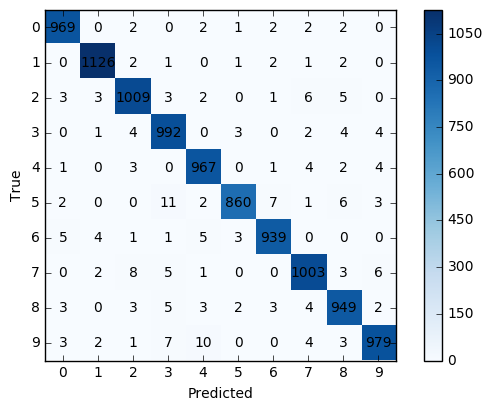

In [15]:
#defined the actual digits of labels again
y_true = data.test.labels
y_true_digit = np.argmax(y_true,axis = 1)

feed_dict_test = {x: data.test.images,
                           y_label: data.test.labels}
save_MDir = 'models/'
save_model = os.path.join(save_MDir,'best_accuracyb')    
saver2restore = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2restore.restore(sess = sess, save_path= save_model)
    print("Restored values:\n")    
    print_acc()
    # find the predicted labels
    y_pred = sess.run(y_pred_digit, feed_dict = feed_dict_test)

    # get the confusion matrix
    conf_mat = confusion_matrix( y_true_digit,
                             y_pred)
    digits = np.array([np.linspace(0,9,10)])
    plot_confusion_matrix(conf_mat, digits)

If an error appears, please restart the kernel and run all cells again.